# The Mandelbrot set in Python
Since Dr. Chaos is delivering the Parson's lecture this week and since we computed the area of the Mandelbrot set in our integration notebook, we oughtta generate a picture of it as well!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from time import time
from numba import jit

import warnings
warnings.filterwarnings('ignore')
from seaborn import color_palette

As we mentioned in our integration notebook, a complex number $c$ is in the Mandelbrot set by definition if the orbit of the critical point zero under iteration of
$$f_c(z)=z^2+c$$
remains bounded. To compute the area, we wanted a simple binary function indicating inside or outside. Often, we'd like to color the complement of the Mandelbrot set according to how fast the orbit diverged. It can be proved that, if the orbit exceeds 2 in absolute value, then it will diverge. Thus, we simply count how many iterates it takes to exceed 2. That is the point of the following `critical_orbit_count` function. The `critical_colors` function accepts two corners `cmin` and `cmax` defining a rectangle in the complex plane and loops over an array of points in that rectangle to determine appropriate colors using `critical_orbit_count`.

In [2]:
@jit
def critical_orbit_count(c, max_iters=100):
    z = c + 0.0j
    cnt = 0
    while(z.real*z.real + z.imag*z.imag <= 4 and cnt < max_iters):
        z = z*z+c
        cnt = cnt+1
    return cnt

@jit
def critical_colors(cmin, cmax, max_iters = 100, resolution=400):
    palette = color_palette("Blues_r", max_iters)
    xs = [cmin.real, cmax.real]
    xs.sort()
    xmin,xmax = xs
    ys = [cmin.imag, cmax.imag]
    ys.sort()
    ymin,ymax = ys
    
    xrange = xmax-xmin
    yrange = ymax-ymin
    if xrange >= yrange:
        xdim = int(resolution)
        ydim = int(xdim*(yrange/xrange))
        delta = xrange/xdim
    else:
        ydim = int(resolution)
        xdim = int(ydim*(xrange/yrange))
        delta = yrange/resolution

    colors = np.zeros((ydim,xdim,3))
    for i in range(ydim):
        for j in range(xdim):
            c = complex(xmin + j*delta, ymin + i*delta)
            count = critical_orbit_count(c, max_iters)
            if count < max_iters:
                colors[i,j] = palette[count]
    
    return colors

Let's determine some colors in a rectangle.

In [3]:
cmin = -2-1.3j
cmax = 0.6+1.3j
precompile = critical_colors(cmin,cmax, max_iters = 2, resolution=2)
t = time()
colors = critical_colors(cmin,cmax, max_iters = 100, resolution=500)
time()-t

0.759627103805542

Hmm... I would like that to be a bit faster. Note that it takes nearly five seconds without `jit`, though.

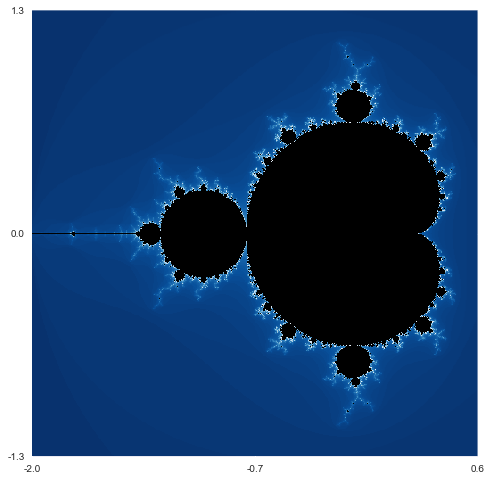

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(colors, zorder=1, interpolation='none')

yres,xres = colors.shape[:2]
ax = plt.gca()
ax.set_yticks([0,yres/2,yres])
ax.set_yticklabels([cmax.imag, (cmax.imag+cmin.imag)/2, cmin.imag])
ax.set_xticks([0,xres/2,xres])
ax.set_xticklabels([cmin.real, (cmax.real+cmin.real)/2, cmax.real]);

There appears to be a limitation to image quality when you display right in the Jupyter notebook. We can save the image to a PNG file, though, and import it back into the notebook.
<img src="mandelpy.png" width=500 style="margin:0">